# P-10:

## 1. Jadeja, Nirav
## 2. Patel, Supriya
## 3. Singh, Abhishek

In [1]:
from Code.DataOperations import DataOperations
from Code.DataVisualization import DataVisualization
from Code.Model import Model

Using TensorFlow backend.


### Now processing the data first: DataOperations.py

### dataset contains comments from various Java based open source projects

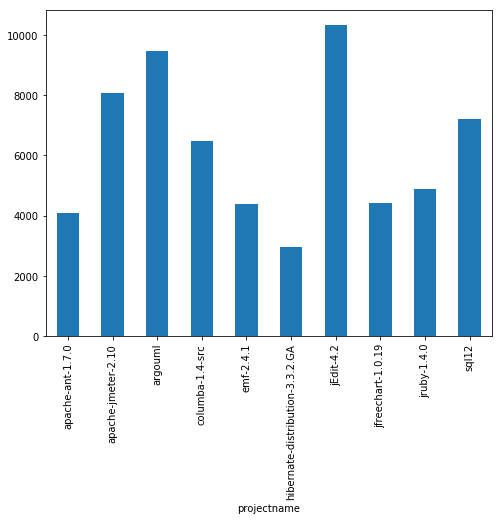

Types of Debt and no of comments: 
1. implementation : 757
2. documentation : 54
3. without_classification : 58204
4. defect : 472
5. design : 2703
6. test : 85


In [2]:
dataOperations = DataOperations()
dataVisualization = DataVisualization()
inputFile = dataOperations.loadData("Dataset/technical_debt_dataset.csv")

dataVisualization.verticalBarGrapgh(inputFile, 'projectname')
dataOperations.debtTypeStats(inputFile, "classification")

### Now, removing irrelevant data: without_classification comments, special characters, stop words. Further, categorizing defect & implementation as 'requirement debt' and all other types to 'others' (except design). At last, saving it as a processed dataset.

In [3]:
processedDataset = dataOperations.filterDataFrame(inputFile, "WITHOUT_CLASSIFICATION")
processedDataset = dataOperations.debtTypeModifications(processedDataset)
processedDataset = dataOperations.removeChracters(processedDataset)

# saving processed dataset
dataOperations.writeCSV(processedDataset, "Dataset/processedDataset")

Writing file finished


### Loading new processed file for further operations

In [4]:
processedFile = dataOperations.loadData("Dataset/processedDataset.csv")

### We will visualize new dataset here

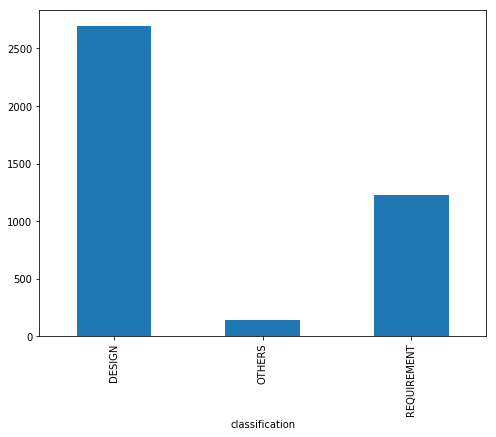

In [5]:
dataVisualization.verticalBarGrapgh(processedFile, 'classification')

### Now, viewing the first 50 most common words for these 2 types of debts and generating word clouds (based on 200 common words).

### For Design debt

In [6]:
mostCommonWords, wordString = dataOperations.certainDebtTypeWords(processedFile, 'DESIGN')

print(mostCommonWords[:50])

[('todo', 1579), ('?', 1012), ('class', 229), ('use', 225), ('fixme', 208), ('need', 207), ('!', 196), ('method', 186), ('new', 154), ('used', 148), ('name', 137), ('uml', 136), ('model', 134), ('get', 125), ('tfm', 124), ('hack', 120), ('type', 118), ('way', 116), ('set', 114), ('better', 113), ('code', 113), ('dont', 112), ('needs', 111), ('really', 109), ('create', 105), ('element', 105), ('make', 103), ('one', 101), ('instance', 100), ('could', 96), ('probably', 92), ('would', 89), ('work', 87), ('remove', 86), ('move', 83), ('handle', 82), ('created', 81), ('may', 80), ('instead', 79), ('check', 79), ('object', 76), ('change', 76), ('checking', 73), ('argument', 71), ('since', 70), ('also', 69), ('methods', 69), ('add', 68), ('null', 68), ('file', 68)]


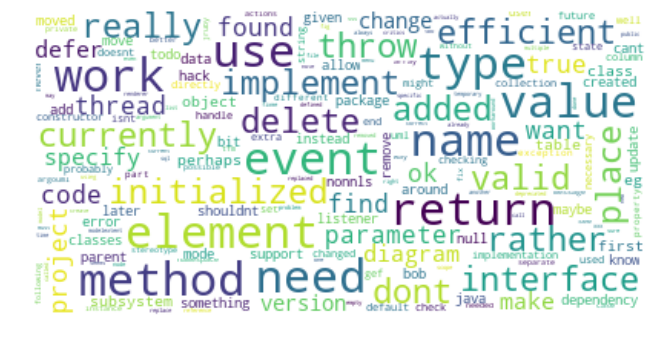

In [7]:
dataVisualization.wordCloud(wordString)

### For Requirement debt

In [8]:
mostCommonWords, wordString = dataOperations.certainDebtTypeWords(processedFile, 'REQUIREMENT')

print(mostCommonWords[:50])

[('todo', 859), ('?', 220), ('dont', 115), ('fixme', 113), ('need', 98), ('needed', 86), ('!', 79), ('require', 78), ('pop', 75), ('work', 64), ('use', 63), ('check', 61), ('add', 57), ('uml', 54), ('implement', 48), ('method', 44), ('value', 40), ('make', 40), ('one', 38), ('implementation', 37), ('tfm', 37), ('null', 36), ('may', 35), ('would', 35), ('support', 35), ('yet', 34), ('needs', 34), ('list', 32), ('model', 32), ('message', 32), ('set', 31), ('new', 30), ('really', 30), ('string', 30), ('name', 30), ('also', 30), ('code', 29), ('file', 29), ('implemented', 29), ('get', 29), ('bug', 28), ('user', 28), ('error', 26), ('doesnt', 25), ('variable', 25), ('type', 25), ('case', 25), ('show', 24), ('exception', 23), ('block', 23)]


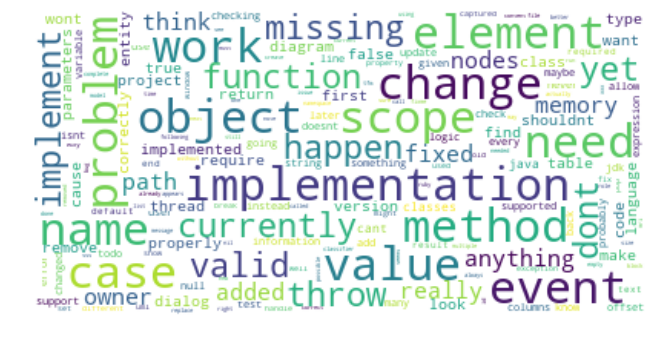

In [9]:
dataVisualization.wordCloud(wordString)

### For Other type

In [10]:
mostCommonWords, wordString = dataOperations.certainDebtTypeWords(processedFile, 'OTHERS')

print(mostCommonWords[:50])

[('todo', 102), ('test', 45), ('?', 33), ('tests', 32), ('!', 18), ('fixme', 17), ('needs', 15), ('string', 14), ('document', 13), ('add', 13), ('name', 13), ('documentation', 13), ('need', 12), ('given', 12), ('function', 12), ('message', 11), ('make', 10), ('use', 10), ('uml', 10), ('yet', 9), ('file', 8), ('supported', 7), ('assert', 7), ('class', 6), ('doesnt', 6), ('dont', 6), ('though', 6), ('spec', 6), ('also', 6), ('check', 6), ('even', 6), ('events', 6), ('method', 6), ('remove', 6), ('needed', 5), ('created', 5), ('attribute', 5), ('sequence', 5), ('model', 5), ('tfm', 5), ('want', 5), ('would', 5), ('tested', 5), ('constructor', 5), ('windows', 5), ('new', 4), ('sure', 4), ('work', 4), ('used', 4), ('way', 4)]


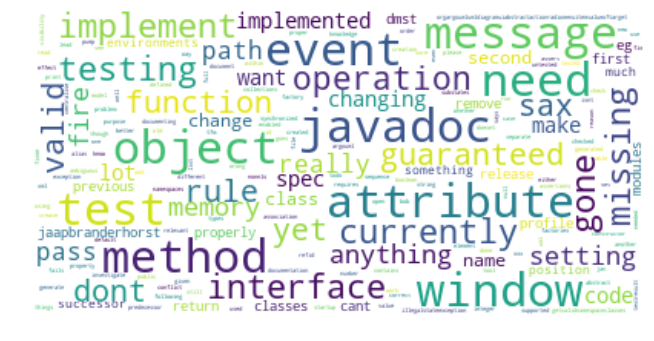

In [11]:
dataVisualization.wordCloud(wordString)

### Creating various model and testing our dataset
### List of models: Logistic Refression, SVC, Linear SVC, Naive Bayes, Perceptron, Ridge Classifier, Neural Network

In [12]:
model = Model(processedFile)

### 1. Logistic Regression:

In [13]:
logisticRegAccuracy, logisticRegF1, logisticRegPrecision, logisticRegRecall  = model.logisticRegression()

Logistic Regression: 
1. Accuracy: 73.219 
2. F1 Score: 0.6623 
3. Precision: 0.7141 
4. Recall: 0.6320


### 2. SVC

In [14]:
svcAccuracy, svcF1, svcPrecision, svcRecall = model.svmSVC()

SVC: 
1. Accuracy: 65.602 
2. F1 Score: 0.2641 
3. Precision: 0.2187 
4. Recall: 0.3333


### 3. Linear SVC

In [15]:
linearSVCAccuracy, linearSVCF1, linearSVCPrecision, linearSVCRecall = model.linearSVC()

Linear SVC: 
1. Accuracy: 76.167 
2. F1 Score: 0.6938 
3. Precision: 0.7782 
4. Recall: 0.6459


### 4. Naive Bayes: 

In [16]:
naiveBayesAccuracy, naiveBayesF1, naiveBayesPrecision, naiveBayesRecall = model.naiveBayes()

Naive Bayes: 
1. Accuracy: 72.318 
2. F1 Score: 0.4006 
3. Precision: 0.5388 
4. Recall: 0.4090


### 5. Perceptron:

In [17]:
perceptronAccuracy, perceptronF1, perceptronPrecision, perceptronRecall = model.perceptron()

Perceptron: : 
1. Accuracy: 73.464 
2. F1 Score: 0.6604 
3. Precision: 0.6784 
4. Recall: 0.6455


### 6. Ridge Classifier: 

In [18]:
ridgeAccuracy, ridgeF1, ridgePrecision, ridgeRecall = model.ridgeClassifierCV()

Ridge Classifier: : 
1. Accuracy: 76.740 
2. F1 Score: 0.6719 
3. Precision: 0.7826 
4. Recall: 0.6192


### 7. Neural Network:

In [19]:
nnHistory, nnAccuracy =  model.neuralNetwork()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Neural Network Accuracy:  76.577 %


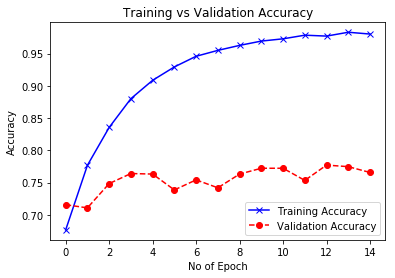

In [20]:
dataVisualization.lineGraph(nnHistory.history['acc'], nnHistory.history['val_acc'])

### Let's view the all accuracy results via graph

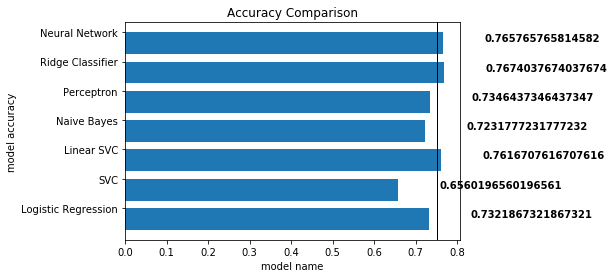

In [21]:
x = ['Logistic Regression', 'SVC', 'Linear SVC', 'Naive Bayes', 'Perceptron', 'Ridge Classifier', 'Neural Network']
y = [logisticRegAccuracy, svcAccuracy, linearSVCAccuracy, naiveBayesAccuracy, perceptronAccuracy, ridgeAccuracy, nnAccuracy]

dataVisualization.horizontalBarGrapgh(x, y)